Импортируем библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

Профилирование данных

In [ ]:
df = pd.read_csv('data.csv', sep=';')

In [ ]:
#проверяем типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5084 entries, 0 to 5083
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Регион              5084 non-null   object 
 1   Учебное учреждение  5084 non-null   object 
 2   Доля несъедаемых    5084 non-null   int64  
 3   Всего меню          5084 non-null   int64  
 4   % по Санпин         5084 non-null   float64
 5   Стоимость завтрак   5084 non-null   float64
 6   Стоимость обед      5084 non-null   float64
 7   Бз                  5084 non-null   float64
 8   Жз                  5084 non-null   float64
 9   Уз                  5084 non-null   float64
 10  Бо                  5084 non-null   float64
 11  Жо                  5084 non-null   float64
 12  Уо                  5084 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 516.5+ KB


In [ ]:
df.head()

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
0,Московская область,МАОУ «Лицей (ЭБ)»,20,3,66.7,131.87,114.82,31.33,13.8,77.60,26.80,22.60,75.03
1,Московская область,МАОУ «СОШ № 21»,20,4,100.0,127.04,112.03,24.50,19.5,73.75,31.25,20.25,109.25
2,Московская область,МБОУ «СОШ № 20»,20,2,0.0,117.55,100.65,30.50,28.5,87.50,32.40,37.05,75.40
3,Московская область,МКОУ ООШ с.Тахтоямск,-1,2,100.0,114.93,0.00,14.50,15.0,81.90,0.00,0.00,0.00
4,Московская область,МКОУ СОШ п.Ола,20,4,100.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00


In [ ]:
#отсортируем регионы по алфавиту и индексу
df.sort_values(by=['Регион'], inplace=True)
df.index = np.arange(0,5084)
df

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20,5,100.0,0.00,0.0,15.34,15.84,59.96,22.22,22.62,91.62
1,Алтайский край,"Красноярская СОШ, филиал МКОУ Поспелихинская С...",20,2,100.0,77.00,0.0,16.50,17.00,63.00,0.00,0.00,0.00
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20,5,100.0,75.20,0.0,20.40,21.00,84.20,0.00,0.00,0.00
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30,5,40.0,88.62,0.0,26.00,26.20,103.60,0.00,0.00,0.00
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",-1,5,60.0,0.00,0.0,26.48,25.50,88.70,31.42,32.88,108.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30,4,100.0,79.00,79.0,16.25,19.75,83.50,20.50,23.75,86.00
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20,4,75.0,68.97,79.0,15.75,20.50,95.25,23.25,25.00,101.00
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20,5,80.0,66.09,78.2,21.20,32.60,84.20,29.00,25.40,122.80
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,-1,5,0.0,0.00,0.0,20.20,19.00,76.20,25.80,30.00,100.20


In [ ]:
# посмотрим на разброс данных
df.describe()

,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
count,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000
mean,17.489182,4.566090,79.539929,63.683615,50.488175,21.177836,18.168544,70.952884,22.798356,20.487055,68.079072
std,8.536925,0.927087,33.002071,294.921707,155.459625,108.351901,42.357557,77.731703,314.062633,176.052516,123.852978
min,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,5.000000,72.925000,0.000000,0.000000,15.400000,14.830000,64.265000,0.000000,0.000000,0.000000
50%,20.000000,5.000000,100.000000,67.790000,0.000000,19.000000,18.500000,76.500000,23.800000,22.400000,91.010000
75%,20.000000,5.000000,100.000000,86.000000,90.000000,22.440000,21.700000,86.042500,28.740000,27.662500,109.400000
max,50.000000,6.000000,100.000000,17789.140000,9852.360000,6017.180000,2021.820000,2094.700000,22012.860000,12014.560000,6144.240000


In [ ]:
# было замечено, что в столбце "Доля несъедаемых" мнимальное значение соотвествует -1. По количесву значений предположим, что таким образом в системе фиксировали нуевые значения
df['Доля несъедаемых'].value_counts()

,count
Доля несъедаемых,
20,3948
-1,795
30,300
40,30
50,11


In [ ]:
# заменим значения -1 в столбце "Доля несъедаемых" на ноль
df.loc[df['Доля несъедаемых'] < 1, 'Доля несъедаемых'] = 0

In [ ]:
# так как в дальнейшем планируем работать со средними значениями за неделю, посмотрим на количество школ, которые отправили менее 50% данных
df['Всего меню'].value_counts()

,count
Всего меню,
5,3833
4,723
3,229
1,148
2,146
6,5


In [ ]:
#в дальнейшем анализе будем использовать данные, где количество меню превышает 50%, перезаписываем датафрейм в новую переменную
df1 = df[df['Всего меню'] >= 3]
df1['Всего меню'].value_counts()

,count
Всего меню,
5,3833
4,723
3,229
6,5


Работа с дубликатами

In [ ]:
# посмотрим, есть ли повторы в столбце "Учебное учреждение"
df1['Учебное учреждение'].value_counts()

,count
Учебное учреждение,
МКОУ Основная общеобразовательная школа № 11 Верхние Серги,2
Виноградовский филиал МБОУ школа с. Анучино,2
"МБОУ ""Ильинская СОШ""",2
МКОУ СОШ п.Терней,2
"МБОУ ""ОЦ ""ГАРМОНИЯ"" ПГО",2
...,...
МАОУ Дубенская ООШ,1
филиал МБОУ КСШ Холязинская ОШ,1
МБОУ Черновская СШ,1


In [ ]:
# удаляем дуликаты
df1.drop_duplicates(subset = ['Учебное учреждение'], inplace=True)
df1.drop_duplicates(subset = ['Бз','Жз','Уз','Бо','Жо','Уо'], inplace=True)

<ipython-input-13-8f6e7e0a2485>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(subset = ['Учебное учреждение'], inplace=True)
<ipython-input-13-8f6e7e0a2485>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(subset = ['Бз','Жз','Уз','Бо','Жо','Уо'], inplace=True)


In [ ]:
# проверяем: всё удалилось
df1['Учебное учреждение'].value_counts()

,count
Учебное учреждение,
"МАОУ СОШ № 134, г.Барнаул",1
МБОУ ООШ №11 г. Красный Сулин (Красносулинский район),1
"МБОУ ""Гимназия №19"" (г. Ростов-на-Дону, Первомайский район)",1
"МБОУ ""Школа №1"" (г. Ростов-на-Дону, Пролетарский район)",1
"МБОУ ""Школа №106"" (г. Ростов-на-Дону, Пролетарский район)",1
...,...
МБОУ СШ № 2 им. А.С. Пушкина,1
МБОУ СШ № 7 им.А.П.Гайдара,1
МБОУ НШ № 12,1


In [ ]:
# переопределим значения в столбцу "Доля несъедаемых" с целочисленного, на число с плавающе точкой. Это необхоимо для дальнейшего анализа
df1['Доля несъедаемых'] = df1['Доля несъедаемых'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3959 entries, 0 to 5083
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Регион              3959 non-null   object 
 1   Учебное учреждение  3959 non-null   object 
 2   Доля несъедаемых    3959 non-null   float64
 3   Всего меню          3959 non-null   int64  
 4   % по Санпин         3959 non-null   float64
 5   Стоимость завтрак   3959 non-null   float64
 6   Стоимость обед      3959 non-null   float64
 7   Бз                  3959 non-null   float64
 8   Жз                  3959 non-null   float64
 9   Уз                  3959 non-null   float64
 10  Бо                  3959 non-null   float64
 11  Жо                  3959 non-null   float64
 12  Уо                  3959 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 433.0+ KB


<ipython-input-15-8c514de1b629>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Доля несъедаемых'] = df1['Доля несъедаемых'].astype(float)


Работа с пропусками

In [ ]:
# проверяем на наличие пропусков в столбцах по бжу и стоимости
filtered_df = df1[(df1['Стоимость завтрак'] < 1 ) & (df1['Стоимость обед'] < 1) & (df1['Бз'] < 1) & (df1['Бо'] < 1)]
filtered_df

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
121,Алтайский край,"МБОУ Семёно-Красиловская СОШ, Кытмановский район",0.0,5,100.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0
2770,Республика Дагестан,"МКОУ ""Санчинская СОШ""",20.0,5,100.0,0.02,0.0,0.64,718.22,79.56,0.0,0.0,0.0


In [ ]:
# удаляем строки с пропусками по индексу
df1.drop(121, inplace=True)
df1.drop(2770, inplace=True)

<ipython-input-17-526aad207166>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(121, inplace=True)
<ipython-input-17-526aad207166>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(2770, inplace=True)


In [ ]:
#создадм копию рабочего датафрейма и заменим все нули на NaN
df2 = df1[:]
df2.replace(0.0, np.NaN, inplace=True)
df2

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,NaN,NaN,15.34,15.84,59.96,22.22,22.62,91.62
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.20,NaN,20.40,21.00,84.20,NaN,NaN,NaN
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.62,NaN,26.00,26.20,103.60,NaN,NaN,NaN
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",NaN,5,60.0,NaN,NaN,26.48,25.50,88.70,31.42,32.88,108.62
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,NaN,NaN,26.00,25.00,94.50,29.75,31.50,110.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.00,79.0,16.25,19.75,83.50,20.50,23.75,86.00
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.97,79.0,15.75,20.50,95.25,23.25,25.00,101.00
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.09,78.2,21.20,32.60,84.20,29.00,25.40,122.80
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,NaN,5,NaN,NaN,NaN,20.20,19.00,76.20,25.80,30.00,100.20


In [ ]:
# оценим количество отсутсвующих значений
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3957 entries, 0 to 5083
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Регион              3957 non-null   object 
 1   Учебное учреждение  3957 non-null   object 
 2   Доля несъедаемых    3353 non-null   float64
 3   Всего меню          3957 non-null   int64  
 4   % по Санпин         3599 non-null   float64
 5   Стоимость завтрак   2706 non-null   float64
 6   Стоимость обед      1875 non-null   float64
 7   Бз                  3337 non-null   float64
 8   Жз                  3337 non-null   float64
 9   Уз                  3337 non-null   float64
 10  Бо                  2363 non-null   float64
 11  Жо                  2363 non-null   float64
 12  Уо                  2363 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 432.8+ KB


In [ ]:
#заполним пропуски с помощью метода k-ближайших соседей
#для этого создадим новую переменную, соержащую столцы только с числовыми значениями с плавающей точкой
df_num3 = df2.select_dtypes('float64')
imputer = KNNImputer(n_neighbors=5, weights='uniform') #создаем импутер
imputer.fit(df_num3)
df_num3 = pd.DataFrame(imputer.transform(df_num3), index=df_num3.index, columns=df_num3.columns) #заполняем недостающие значения
df_num3

,Доля несъедаемых,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
0,20.0,100.0,65.032,103.442,15.34,15.84,59.96,22.22,22.620,91.62
2,20.0,100.0,75.200,112.120,20.40,21.00,84.20,29.07,29.252,116.40
3,30.0,40.0,88.620,2054.842,26.00,26.20,103.60,25.28,27.650,108.10
4,20.0,60.0,127.040,99.794,26.48,25.50,88.70,31.42,32.880,108.62
5,20.0,25.0,86.700,78.794,26.00,25.00,94.50,29.75,31.500,110.50
...,...,...,...,...,...,...,...,...,...,...
5079,30.0,100.0,79.000,79.000,16.25,19.75,83.50,20.50,23.750,86.00
5080,20.0,75.0,68.970,79.000,15.75,20.50,95.25,23.25,25.000,101.00
5081,20.0,80.0,66.090,78.200,21.20,32.60,84.20,29.00,25.400,122.80
5082,20.0,100.0,83.718,109.750,20.20,19.00,76.20,25.80,30.000,100.20


In [ ]:
#перезаписываем получившиеся значения в наш рабочий датафрейм
df1['Стоимость обед']=df_num3['Стоимость обед']
df1['Стоимость завтрак']=df_num3['Стоимость завтрак']
df1['Бз']=df_num3['Бз']
df1['Жз']=df_num3['Жз']
df1['Уз']=df_num3['Уз']
df1['Бо']=df_num3['Бо']
df1['Жо']=df_num3['Жо']
df1['Уо']=df_num3['Уо']
df1['Доля несъедаемых']=df_num3['Доля несъедаемых']
df1['% по Санпин']=df_num3['% по Санпин']
df1

<ipython-input-21-ce580ed26610>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Стоимость обед']=df_num3['Стоимость обед']
<ipython-input-21-ce580ed26610>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Стоимость завтрак']=df_num3['Стоимость завтрак']
<ipython-input-21-ce580ed26610>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,65.032,103.442,15.34,15.84,59.96,22.22,22.620,91.62
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.200,112.120,20.40,21.00,84.20,29.07,29.252,116.40
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.620,2054.842,26.00,26.20,103.60,25.28,27.650,108.10
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",20.0,5,60.0,127.040,99.794,26.48,25.50,88.70,31.42,32.880,108.62
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,86.700,78.794,26.00,25.00,94.50,29.75,31.500,110.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.000,79.000,16.25,19.75,83.50,20.50,23.750,86.00
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.970,79.000,15.75,20.50,95.25,23.25,25.000,101.00
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.090,78.200,21.20,32.60,84.20,29.00,25.400,122.80
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,20.0,5,100.0,83.718,109.750,20.20,19.00,76.20,25.80,30.000,100.20


In [ ]:
#проверим: пропущенных значений не осталось
df1.isnull().sum()

,0
Регион,0
Учебное учреждение,0
Доля несъедаемых,0
Всего меню,0
% по Санпин,0
Стоимость завтрак,0
Стоимость обед,0
Бз,0
Жз,0
Уз,0


Работа с выбросами

In [ ]:
#нормируем значения
df1_num = df1.select_dtypes('float64')
df1_std = pd.DataFrame()
for col in df1_num.columns:
    n = df1_num[col].mean()
    s = df1_num[col].std()
    df1_std[col + '_n'] = (df1_num[col] - n) / s
df1_std.head(10)

,Доля несъедаемых_n,% по Санпин_n,Стоимость завтрак_n,Стоимость обед_n,Бз_n,Жз_n,Уз_n,Бо_n,Жо_n,Уо_n
0,-0.273199,0.632886,-0.102967,-0.041788,-0.118267,-0.158674,-0.353012,-0.066844,-0.104750,-0.263754
2,-0.273199,0.632886,-0.074995,-0.003217,-0.081111,-0.054911,-0.058804,-0.049034,-0.074394,-0.092467
3,2.946128,-2.012622,-0.038078,8.631634,-0.039989,0.049656,0.176658,-0.058888,-0.081727,-0.149839
4,-0.273199,-1.130786,0.067613,-0.058002,-0.036465,0.035580,-0.004187,-0.042924,-0.057788,-0.146245
5,-0.273199,-2.673999,-0.043360,-0.151341,-0.039989,0.025525,0.066209,-0.047266,-0.064105,-0.133250
6,-0.273199,0.632886,-0.076948,-0.065709,-0.009882,0.000188,0.040964,-0.006898,-0.033319,0.316132
7,-0.273199,0.632886,-0.078296,-0.215407,-0.100203,-0.115238,-0.194742,-0.060136,-0.071886,-0.350987
8,-0.273199,0.632886,-0.096722,-0.144461,-0.043808,-0.043248,0.064510,-0.055087,-0.062713,-0.050288
9,-0.273199,0.632886,-0.078880,-0.117846,-0.017960,0.109984,0.169376,-0.049039,-0.082816,-0.205027
10,-0.273199,0.632886,-0.076948,-0.272255,-0.096532,-0.130521,-0.063902,-0.053220,-0.084885,-0.298315


<ipython-input-24-b7020de7bacf>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df1_std.columns)


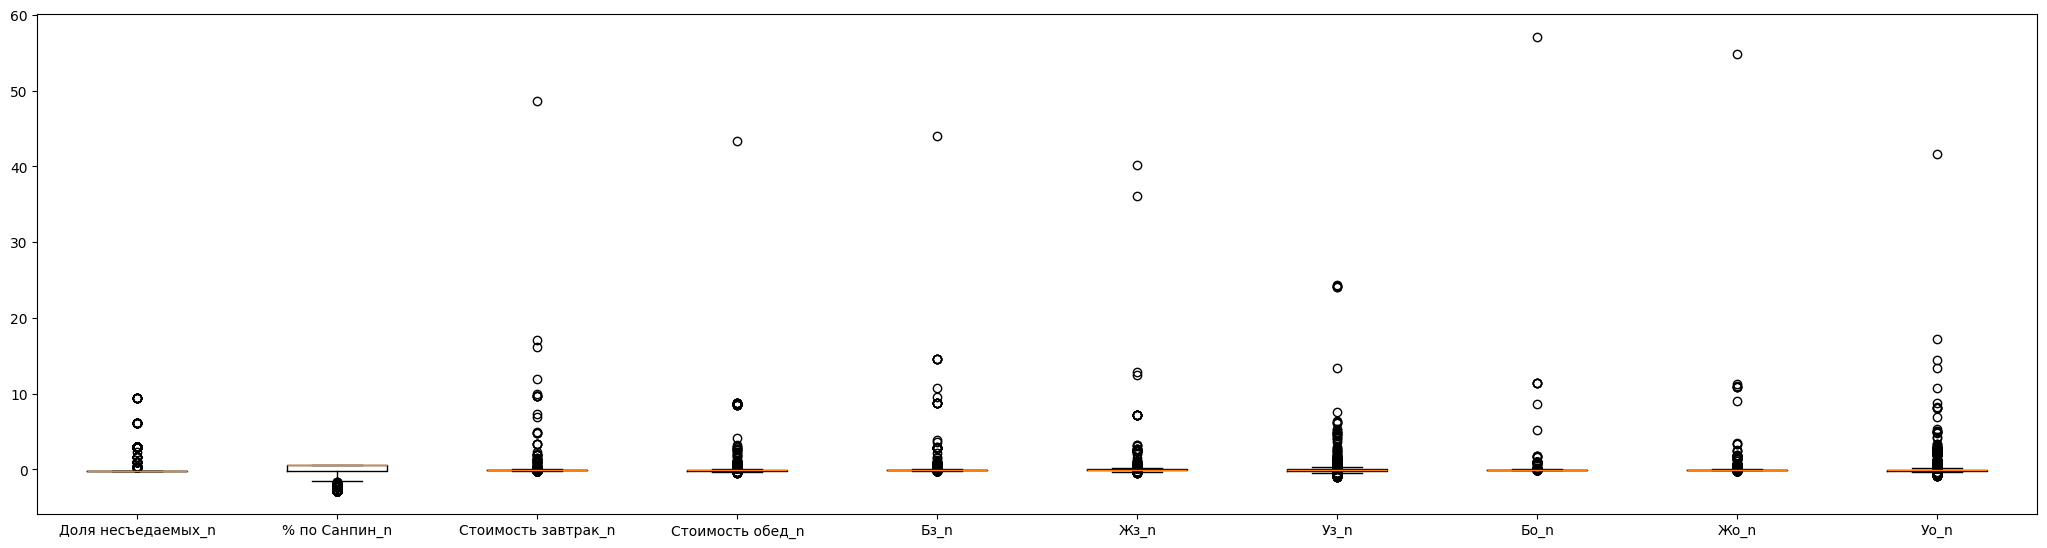

In [ ]:
# визуализируем ящик с усами, чтобы оценить количество выбросов
fig = plt.figure(figsize =(20,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df1_std.columns)

data = []
for col in df1_std.columns:
    data.append(df1_std[col])

bp = ax.boxplot(data, widths=0.5)
plt.show()

In [ ]:
# для каждого столбца пропишем цикл, в котором значениям, выходящим за интерквартилный размах будет присваиваться NaN
for x in ['Стоимость завтрак']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan


In [ ]:
for x in ['Стоимость обед']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['Бз']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['Бо']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['Жз']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['Уз']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['Уо']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['Жо']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
# посмотрим на строки max и min. Действительно, выбросов больше нет
df1.describe()

,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
count,3957.000000,3957.000000,3957.000000,3643.000000,3643.000000,3704.000000,3674.000000,3630.000000,3681.000000,3557.000000,3542.000000
mean,20.848623,4.733637,85.646181,79.582815,89.584033,20.824314,20.128230,81.184084,29.840331,28.174337,109.666055
std,3.106238,0.547827,22.679958,16.446531,16.989823,4.121813,3.972252,11.854571,5.067272,4.671365,14.475545
min,20.000000,3.000000,20.000000,34.170000,41.630000,9.380000,9.400000,49.000000,15.600000,14.800000,71.400000
25%,20.000000,5.000000,80.000000,69.570000,77.913000,18.080000,17.600000,73.600000,26.330000,25.100000,100.850500
50%,20.000000,5.000000,100.000000,78.680000,87.270000,20.335000,19.580000,80.320000,29.400000,27.622000,109.000000
75%,20.000000,5.000000,100.000000,90.425000,98.818000,23.400000,22.415000,88.000000,32.928000,30.800000,117.952500
max,50.000000,6.000000,100.000000,128.000000,139.170000,32.800000,31.430000,114.540000,44.598000,42.526000,151.200000


In [ ]:
# но теперь появились нулевые значения, с которым проведём аналогичную работу
df1.isnull().sum()

,0
Регион,0
Учебное учреждение,0
Доля несъедаемых,0
Всего меню,0
% по Санпин,0
Стоимость завтрак,314
Стоимость обед,314
Бз,253
Жз,283
Уз,327


In [ ]:
#заполняем образовавшиеся пропуски
df_num3 = df1.select_dtypes('float64')
imputer = KNNImputer(n_neighbors=5, weights='uniform') #создаем импьютер
imputer.fit(df_num3)
df_num3 = pd.DataFrame(imputer.transform(df_num3), index=df_num3.index, columns=df_num3.columns) #заполняем недостающие значения
df_num3


,Доля несъедаемых,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
0,20.0,100.0,65.032,103.4420,15.34,15.8400,59.96,22.22,22.620,91.62
2,20.0,100.0,75.200,112.1200,20.40,21.0000,84.20,29.07,29.252,116.40
3,30.0,40.0,88.620,85.3264,26.00,26.2000,103.60,25.28,27.650,108.10
4,20.0,60.0,127.040,99.7940,26.48,25.5000,88.70,31.42,32.880,108.62
5,20.0,25.0,86.700,78.7940,26.00,25.0000,94.50,29.75,31.500,110.50
...,...,...,...,...,...,...,...,...,...,...
5079,30.0,100.0,79.000,79.0000,16.25,19.7500,83.50,20.50,23.750,86.00
5080,20.0,75.0,68.970,79.0000,15.75,20.5000,95.25,23.25,25.000,101.00
5081,20.0,80.0,66.090,78.2000,21.20,20.8848,84.20,29.00,25.400,122.80
5082,20.0,100.0,83.718,109.7500,20.20,19.0000,76.20,25.80,30.000,100.20


In [ ]:
#перезапишем в рабочий датафейм
df1['Стоимость обед']=df_num3['Стоимость обед']
df1['Стоимость завтрак']=df_num3['Стоимость завтрак']
df1['Бз']=df_num3['Бз']
df1['Жз']=df_num3['Жз']
df1['Уз']=df_num3['Уз']
df1['Бо']=df_num3['Бо']
df1['Жо']=df_num3['Жо']
df1['Уо']=df_num3['Уо']

<ipython-input-36-34a936b1d674>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Стоимость обед']=df_num3['Стоимость обед']
<ipython-input-36-34a936b1d674>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Стоимость завтрак']=df_num3['Стоимость завтрак']
<ipython-input-36-34a936b1d674>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
#проверка: нулевых значений больше нет
df1.isnull().sum()

,0
Регион,0
Учебное учреждение,0
Доля несъедаемых,0
Всего меню,0
% по Санпин,0
Стоимость завтрак,0
Стоимость обед,0
Бз,0
Жз,0
Уз,0


In [ ]:
df1.describe()

,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
count,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000
mean,20.848623,4.733637,85.646181,79.640633,89.305446,20.826398,20.178492,81.290565,29.915534,28.296113,109.894453
std,3.106238,0.547827,22.679958,16.106841,16.555194,4.046694,3.894022,11.566424,4.962166,4.545247,14.036693
min,20.000000,3.000000,20.000000,34.170000,41.630000,9.380000,9.400000,49.000000,15.600000,14.800000,71.400000
25%,20.000000,5.000000,80.000000,69.674000,78.010000,18.200000,17.726000,73.940000,26.460000,25.280000,101.400000
50%,20.000000,5.000000,100.000000,78.908000,86.777600,20.398000,19.680000,80.630000,29.560000,27.844000,109.306400
75%,20.000000,5.000000,100.000000,90.310000,98.080000,23.260000,22.420000,88.000000,32.877200,30.914000,118.012000
max,50.000000,6.000000,100.000000,128.000000,139.170000,32.800000,31.430000,114.540000,44.598000,42.526000,151.200000


Исследовательский анализ данных

In [ ]:
grouped = df1.groupby('Регион')
aggregated = grouped.agg({'% по Санпин': 'mean'})
print(aggregated)

                                 % по Санпин
Регион                                      
Алтайский край                     91.171970
Амурская область                   82.307451
Астраханская область               91.750000
Белгородская область               78.117391
Брянская область                   92.339286
...                                      ...
Чеченская республика               74.394737
Чувашская республика               77.378947
Чукотский автономный округ         80.000000
Ямало-Ненецкий автономный округ    89.000000
Ярославская область                83.333333

[83 rows x 1 columns]


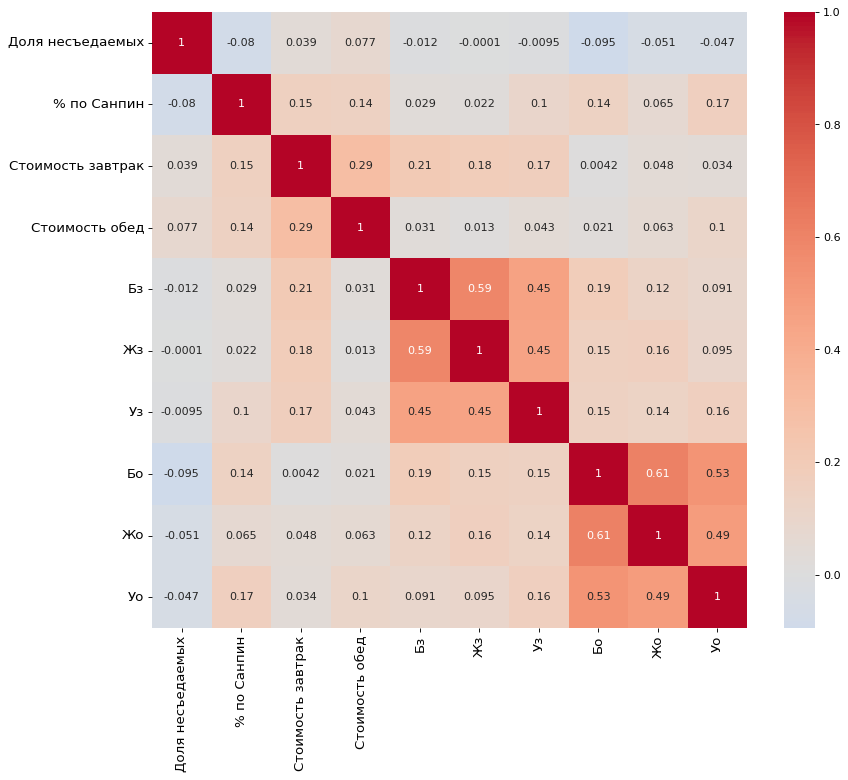

In [ ]:
#посмотрим на корреляцию принаков между собой, возможно это поможет в дальнейшем анализе
plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(df1_num.corr(method='spearman'), xticklabels=df1_num.corr(method='spearman').columns, yticklabels=df1_num.corr(method='spearman').columns, cmap='coolwarm', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# для каждого нутриента создадим новую колонку, в которую будем записывать соотвествует ли числовое значение норме
df1['proteins_b'] = 0
df1.loc[df1['Бз'] < 14, 'proteins_b'] = 'недостаток'
condition = (df1['Бз'] > 13) & (df1['Бз'] < 28)
df1.loc[condition, 'proteins_b'] = 'норма'
df1.loc[df1['Бз'] >= 28, 'proteins_b'] = 'избыток'
df1

<ipython-input-41-c5724f68609c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['proteins_b'] = 0
<ipython-input-41-c5724f68609c>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'недостаток' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[df1['Бз'] < 14, 'proteins_b'] = 'недостаток'


,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо,proteins_b
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,65.032,103.4420,15.34,15.8400,59.96,22.22,22.620,91.62,норма
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.200,112.1200,20.40,21.0000,84.20,29.07,29.252,116.40,норма
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.620,85.3264,26.00,26.2000,103.60,25.28,27.650,108.10,норма
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",20.0,5,60.0,127.040,99.7940,26.48,25.5000,88.70,31.42,32.880,108.62,норма
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,86.700,78.7940,26.00,25.0000,94.50,29.75,31.500,110.50,норма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.000,79.0000,16.25,19.7500,83.50,20.50,23.750,86.00,норма
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.970,79.0000,15.75,20.5000,95.25,23.25,25.000,101.00,норма
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.090,78.2000,21.20,20.8848,84.20,29.00,25.400,122.80,норма
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,20.0,5,100.0,83.718,109.7500,20.20,19.0000,76.20,25.80,30.000,100.20,норма


In [ ]:

df1['proteins_b'].value_counts()

,count
proteins_b,
норма,3646
избыток,229
недостаток,82


In [ ]:
df1['fats_b'] = 0
df1.loc[df1['Жз'] < 14, 'fats_b'] = 'недостаток'
condition = (df1['Жз'] > 13) & (df1['Жз'] < 28)
df1.loc[condition, 'fats_b'] = 'норма'
df1.loc[df1['Жз'] >= 28, 'fats_b'] = 'избыток'

df1['carb_b'] = 0
df1.loc[df1['Уз'] < 48, 'carb_b'] = 'недостаток'
condition = (df1['Уз'] > 47) & (df1['Уз'] < 90)
df1.loc[condition, 'carb_b'] = 'норма'
df1.loc[df1['Уз'] >= 90, 'carb_b'] = 'избыток'
df1

<ipython-input-43-a85cdd35908a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fats_b'] = 0
<ipython-input-43-a85cdd35908a>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'недостаток' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[df1['Жз'] < 14, 'fats_b'] = 'недостаток'
<ipython-input-43-a85cdd35908a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['carb_b'] = 0


,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо,proteins_b,fats_b,carb_b
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,65.032,103.4420,15.34,15.8400,59.96,22.22,22.620,91.62,норма,норма,норма
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.200,112.1200,20.40,21.0000,84.20,29.07,29.252,116.40,норма,норма,норма
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.620,85.3264,26.00,26.2000,103.60,25.28,27.650,108.10,норма,норма,избыток
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",20.0,5,60.0,127.040,99.7940,26.48,25.5000,88.70,31.42,32.880,108.62,норма,норма,норма
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,86.700,78.7940,26.00,25.0000,94.50,29.75,31.500,110.50,норма,норма,избыток
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.000,79.0000,16.25,19.7500,83.50,20.50,23.750,86.00,норма,норма,норма
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.970,79.0000,15.75,20.5000,95.25,23.25,25.000,101.00,норма,норма,избыток
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.090,78.2000,21.20,20.8848,84.20,29.00,25.400,122.80,норма,норма,норма
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,20.0,5,100.0,83.718,109.7500,20.20,19.0000,76.20,25.80,30.000,100.20,норма,норма,норма


In [ ]:
df1['carb_b'].value_counts()

,count
carb_b,
норма,3152
избыток,805


In [ ]:
df1['fats_b'].value_counts()

,count
fats_b,
норма,3683
избыток,164
недостаток,110


In [ ]:
#теперь создадим отдельную колонку для завтрака, в которую скомпилируем результаты по всем нутриентам
df1['breakf'] = 'отклонение'
condition = (df1['proteins_b'] == 'норма') & (df1['fats_b'] == 'норма')& (df1['carb_b'] == 'норма')
df1.loc[condition, 'breakf'] = 'норма'
df1

<ipython-input-46-89e3a66fd442>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['breakf'] = 'отклонение'


,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо,proteins_b,fats_b,carb_b,breakf
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,65.032,103.4420,15.34,15.8400,59.96,22.22,22.620,91.62,норма,норма,норма,норма
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.200,112.1200,20.40,21.0000,84.20,29.07,29.252,116.40,норма,норма,норма,норма
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.620,85.3264,26.00,26.2000,103.60,25.28,27.650,108.10,норма,норма,избыток,отклонение
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",20.0,5,60.0,127.040,99.7940,26.48,25.5000,88.70,31.42,32.880,108.62,норма,норма,норма,норма
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,86.700,78.7940,26.00,25.0000,94.50,29.75,31.500,110.50,норма,норма,избыток,отклонение
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.000,79.0000,16.25,19.7500,83.50,20.50,23.750,86.00,норма,норма,норма,норма
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.970,79.0000,15.75,20.5000,95.25,23.25,25.000,101.00,норма,норма,избыток,отклонение
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.090,78.2000,21.20,20.8848,84.20,29.00,25.400,122.80,норма,норма,норма,норма
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,20.0,5,100.0,83.718,109.7500,20.20,19.0000,76.20,25.80,30.000,100.20,норма,норма,норма,норма


In [ ]:
#в основном завтрак соответствует норме по сотношению бжу
df1['breakf'].value_counts()

,count
breakf,
норма,2831
отклонение,1126


In [ ]:
# теперь то же самое проделаем для обеда
# создадим новую колонку для каждого нутриента, в которую будем записывать соотвествует ли его содержание норме
df1['proteins_d'] = 0
condition1 = (df1['Бо'] < 20) & (df1['Бо'] > 0)
df1.loc[condition1, 'proteins_d'] = 'недостаток'
condition = (df1['Бо'] > 19) & (df1['Бо'] < 40)
df1.loc[condition, 'proteins_d'] = 'норма'
df1.loc[df1['Бо'] >= 40, 'proteins_d'] = 'избыток'

df1['fats_d'] = 0
df1.loc[df1['Жо'] < 20, 'fats_d'] = 'недостаток'
condition = (df1['Жо'] > 19) & (df1['Жо'] < 40)
df1.loc[condition, 'fats_d'] = 'норма'
df1.loc[df1['Жо'] >= 40, 'fats_d'] = 'избыток'

df1['carb_d'] = 0
df1.loc[df1['Уо'] < 80, 'carb_d'] = 'недостаток'
condition = (df1['Уо'] > 79) & (df1['Уо'] < 160)
df1.loc[condition, 'carb_d'] = 'норма'
df1.loc[df1['Уо'] >= 160, 'carb_d'] = 'избыток'
df1

<ipython-input-48-489d9ee39bce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['proteins_d'] = 0
<ipython-input-48-489d9ee39bce>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'недостаток' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[condition1, 'proteins_d'] = 'недостаток'
<ipython-input-48-489d9ee39bce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fats_d']

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо,proteins_b,fats_b,carb_b,breakf,proteins_d,fats_d,carb_d
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,65.032,103.4420,15.34,15.8400,59.96,22.22,22.620,91.62,норма,норма,норма,норма,норма,норма,норма
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.200,112.1200,20.40,21.0000,84.20,29.07,29.252,116.40,норма,норма,норма,норма,норма,норма,норма
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.620,85.3264,26.00,26.2000,103.60,25.28,27.650,108.10,норма,норма,избыток,отклонение,норма,норма,норма
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",20.0,5,60.0,127.040,99.7940,26.48,25.5000,88.70,31.42,32.880,108.62,норма,норма,норма,норма,норма,норма,норма
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,86.700,78.7940,26.00,25.0000,94.50,29.75,31.500,110.50,норма,норма,избыток,отклонение,норма,норма,норма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.000,79.0000,16.25,19.7500,83.50,20.50,23.750,86.00,норма,норма,норма,норма,норма,норма,норма
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.970,79.0000,15.75,20.5000,95.25,23.25,25.000,101.00,норма,норма,избыток,отклонение,норма,норма,норма
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.090,78.2000,21.20,20.8848,84.20,29.00,25.400,122.80,норма,норма,норма,норма,норма,норма,норма
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,20.0,5,100.0,83.718,109.7500,20.20,19.0000,76.20,25.80,30.000,100.20,норма,норма,норма,норма,норма,норма,норма


In [ ]:
df1['fats_d'].value_counts()

,count
fats_d,
норма,3845
недостаток,61
избыток,51


In [ ]:
df1['carb_d'].value_counts()

,count
carb_d,
норма,3879
недостаток,78


In [ ]:
df1['proteins_d'].value_counts()

,count
proteins_d,
норма,3764
избыток,147
недостаток,46


In [ ]:
#компиляция результатов трёх колонок по бжу
df1['lunch'] = 'отклонение'
condition = (df1['proteins_d'] == 'норма') & (df1['fats_d'] == 'норма')& (df1['carb_d'] == 'норма')
df1.loc[condition, 'lunch'] = 'норма'
df1

<ipython-input-52-d0265a11bbba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['lunch'] = 'отклонение'


,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,...,Жо,Уо,proteins_b,fats_b,carb_b,breakf,proteins_d,fats_d,carb_d,lunch
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,65.032,103.4420,15.34,15.8400,59.96,...,22.620,91.62,норма,норма,норма,норма,норма,норма,норма,норма
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.200,112.1200,20.40,21.0000,84.20,...,29.252,116.40,норма,норма,норма,норма,норма,норма,норма,норма
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.620,85.3264,26.00,26.2000,103.60,...,27.650,108.10,норма,норма,избыток,отклонение,норма,норма,норма,норма
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",20.0,5,60.0,127.040,99.7940,26.48,25.5000,88.70,...,32.880,108.62,норма,норма,норма,норма,норма,норма,норма,норма
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,86.700,78.7940,26.00,25.0000,94.50,...,31.500,110.50,норма,норма,избыток,отклонение,норма,норма,норма,норма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.000,79.0000,16.25,19.7500,83.50,...,23.750,86.00,норма,норма,норма,норма,норма,норма,норма,норма
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.970,79.0000,15.75,20.5000,95.25,...,25.000,101.00,норма,норма,избыток,отклонение,норма,норма,норма,норма
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.090,78.2000,21.20,20.8848,84.20,...,25.400,122.80,норма,норма,норма,норма,норма,норма,норма,норма
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,20.0,5,100.0,83.718,109.7500,20.20,19.0000,76.20,...,30.000,100.20,норма,норма,норма,норма,норма,норма,норма,норма


In [ ]:
df1['lunch'].value_counts()

,count
lunch,
норма,3628
отклонение,329


<Axes: ylabel='Frequency'>

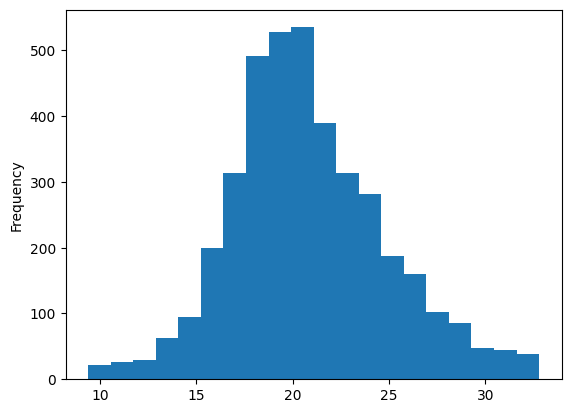

In [ ]:
# посмотрим распределение нутриентов
df1['Бз'].plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

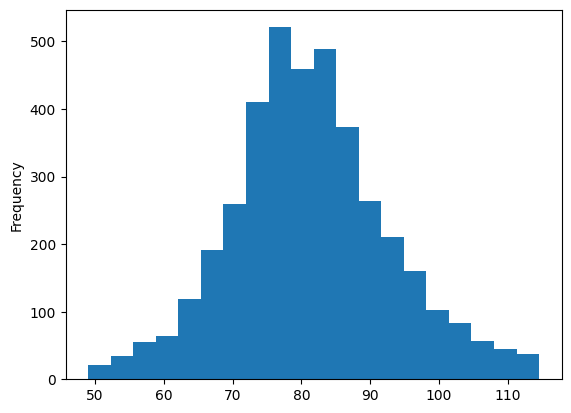

In [ ]:
df1['Уз'].plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

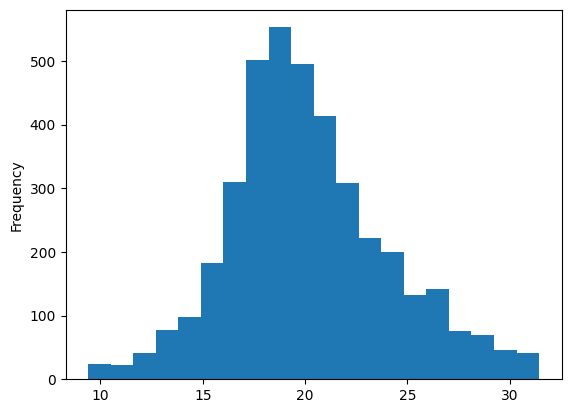

In [ ]:
df1['Жз'].plot(kind='hist', bins=20)

In [ ]:
# создадим колонку 'count_sanpin', в которую будем записывать категориальный признак на основании числовых данных из колонки "% по Санпин"
df1['count_sanpin'] = 'не соответсвует'
df1.loc[df1['% по Санпин'] == 100, 'count_sanpin'] = 'соответствует'
df1['count_sanpin'].value_counts()

<ipython-input-57-df73770826ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['count_sanpin'] = 'не соответсвует'


,count
count_sanpin,
соответствует,2437
не соответсвует,1520


In [ ]:
df1.to_csv('clean_data.csv', sep=';', encoding='utf-8-sig')